In [1]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib seaborn scikit_learn  lightgbm

In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
import lightgbm as lgb

In [5]:
train_df = pd.read_csv(r"C:\Users\bisen\Downloads\train_JDXlpm8\train\train.csv")

In [6]:
train_df.head()

,doj,srcid,destid,final_seatcount
0,2023-03-01,45,46,2838.0
1,2023-03-01,46,45,2298.0
2,2023-03-01,45,47,2720.0
3,2023-03-01,47,45,2580.0
4,2023-03-01,46,9,4185.0


In [7]:
train_df.shape

(67200, 4)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67200 entries, 0 to 67199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doj              67200 non-null  object 
 1   srcid            67200 non-null  int64  
 2   destid           67200 non-null  int64  
 3   final_seatcount  67200 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.1+ MB


In [9]:
transactions_df = pd.read_csv(r"C:\Users\bisen\Downloads\train_JDXlpm8\train\transactions.csv")

In [10]:
transactions_df.columns = transactions_df.columns.str.strip()
transactions_df.columns

Index(['doj', 'doi', 'srcid', 'destid', 'srcid_region', 'destid_region',
       'srcid_tier', 'destid_tier', 'cumsum_seatcount', 'cumsum_searchcount',
       'dbd'],
      dtype='object')

In [11]:
transactions_df.head()

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
0,2023-03-01,2023-01-30,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,8.0,76.0,30
1,2023-03-01,2023-01-30,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,8.0,70.0,30
2,2023-03-01,2023-01-30,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,4.0,142.0,30
3,2023-03-01,2023-01-30,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,0.0,68.0,30
4,2023-03-01,2023-01-30,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,162.0,30


In [12]:
transactions_df.shape

(2266100, 11)

In [13]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266100 entries, 0 to 2266099
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   doj                 object 
 1   doi                 object 
 2   srcid               int64  
 3   destid              int64  
 4   srcid_region        object 
 5   destid_region       object 
 6   srcid_tier          object 
 7   destid_tier         object 
 8   cumsum_seatcount    float64
 9   cumsum_searchcount  float64
 10  dbd                 int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 190.2+ MB


In [14]:
test_df = pd.read_csv(r"C:\Users\bisen\Downloads\test_8gqdJqH.csv")

In [15]:
test_df.head()

,route_key,doj,srcid,destid
0,2025-02-11_46_45,2025-02-11,46,45
1,2025-01-20_17_23,2025-01-20,17,23
2,2025-01-08_02_14,2025-01-08,2,14
3,2025-01-08_08_47,2025-01-08,8,47
4,2025-01-08_09_46,2025-01-08,9,46


In [16]:
test_df.shape

(5900, 4)

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   route_key  5900 non-null   object
 1   doj        5900 non-null   object
 2   srcid      5900 non-null   int64 
 3   destid     5900 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 184.5+ KB


In [18]:
train_df['doj'] = pd.to_datetime(train_df['doj'])
test_df['doj'] = pd.to_datetime(test_df['doj'])
transactions_df['doj'] = pd.to_datetime(transactions_df['doj'])
transactions_df['doi'] = pd.to_datetime(transactions_df['doi'])

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67200 entries, 0 to 67199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   doj              67200 non-null  datetime64[ns]
 1   srcid            67200 non-null  int64         
 2   destid           67200 non-null  int64         
 3   final_seatcount  67200 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   route_key  5900 non-null   object        
 1   doj        5900 non-null   datetime64[ns]
 2   srcid      5900 non-null   int64         
 3   destid     5900 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 184.5+ KB


In [21]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266100 entries, 0 to 2266099
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   doj                 datetime64[ns]
 1   doi                 datetime64[ns]
 2   srcid               int64         
 3   destid              int64         
 4   srcid_region        object        
 5   destid_region       object        
 6   srcid_tier          object        
 7   destid_tier         object        
 8   cumsum_seatcount    float64       
 9   cumsum_searchcount  float64       
 10  dbd                 int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 190.2+ MB


In [22]:
print(test_df['route_key'].unique())

['2025-02-11_46_45' '2025-01-20_17_23' '2025-01-08_02_14' ...
 '2025-01-17_32_19' '2025-01-24_45_03' '2025-01-27_32_19']


In [23]:
print(transactions_df['srcid_region'].unique())

['Karnataka' 'Tamil Nadu' 'Andhra Pradesh' 'Maharashtra and Goa'
 'Rest of North' 'Madhya Pradesh' 'Delhi' 'Rajasthan' 'East 1' 'Kerala']


In [24]:
print(transactions_df['destid_region'].unique())

['Tamil Nadu' 'Karnataka' 'Andhra Pradesh' 'Maharashtra and Goa' 'Delhi'
 'Madhya Pradesh' 'Rest of North' 'East 1' 'Rajasthan' 'Kerala']


In [25]:
print(transactions_df['srcid_tier'].unique())

['Tier 1' 'Tier2' 'Tier 3' 'Tier 4']


In [26]:
print(transactions_df['destid_tier'].unique())

['Tier 1' 'Tier2' 'Tier 3' 'Tier 4']


In [27]:
transactions_df['srcid_region'] = transactions_df['srcid_region'].str.strip()
transactions_df['destid_region'] = transactions_df['destid_region'].str.strip()
transactions_df['srcid_tier'] = transactions_df['srcid_tier'].str.strip()
transactions_df['destid_tier'] = transactions_df['destid_tier'].str.strip()

In [28]:
srcreg_map = {'Karnataka': 1, 'Tamil Nadu': 2, 'Andhra Pradesh': 3, 'Maharashtra and Goa': 4,
 'Rest of North': 5, 'Madhya Pradesh': 6, 'Delhi': 7, 'Rajasthan': 8, 'East 1': 9, 'Kerala': 10}
transactions_df['srcid_region'] = transactions_df['srcid_region'].map(srcreg_map)
destreg_map = {'Karnataka': 1, 'Tamil Nadu': 2, 'Andhra Pradesh': 3, 'Maharashtra and Goa': 4,
 'Rest of North': 5, 'Madhya Pradesh': 6, 'Delhi': 7, 'Rajasthan': 8, 'East 1': 9, 'Kerala': 10}
transactions_df['destid_region'] = transactions_df['destid_region'].map(destreg_map)
srctier_map = {'Tier 1':1, 'Tier 2':2, 'Tier 3':3, 'Tier 4':4}
transactions_df['srcid_tier'] = transactions_df['srcid_tier'].map(srctier_map)
desttier_map = {'Tier 1':1, 'Tier 2':2, 'Tier 3':3, 'Tier 4':4}
transactions_df['destid_tier'] = transactions_df['destid_tier'].map(desttier_map)
transactions_df.info()
transactions_df.describe()
transactions_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266100 entries, 0 to 2266099
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   doj                 datetime64[ns]
 1   doi                 datetime64[ns]
 2   srcid               int64         
 3   destid              int64         
 4   srcid_region        int64         
 5   destid_region       int64         
 6   srcid_tier          float64       
 7   destid_tier         float64       
 8   cumsum_seatcount    float64       
 9   cumsum_searchcount  float64       
 10  dbd                 int64         
dtypes: datetime64[ns](2), float64(4), int64(5)
memory usage: 190.2 MB


,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
0,2023-03-01,2023-01-30,45,46,1,2,1.0,1.0,8.0,76.0,30
1,2023-03-01,2023-01-30,46,45,2,1,1.0,1.0,8.0,70.0,30
2,2023-03-01,2023-01-30,45,47,1,3,1.0,1.0,4.0,142.0,30
3,2023-03-01,2023-01-30,47,45,3,1,1.0,1.0,0.0,68.0,30
4,2023-03-01,2023-01-30,46,9,2,2,1.0,NaN,9.0,162.0,30


In [29]:
pd.isnull(transactions_df)

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2266095,False,False,False,False,False,False,False,True,False,False,False
2266096,False,False,False,False,False,False,True,False,False,False,False
2266097,False,False,False,False,False,False,False,False,False,False,False
2266098,False,False,False,False,False,False,False,True,False,False,False


In [30]:
pd.isnull(transactions_df).sum()

doj                        0
doi                        0
srcid                      0
destid                     0
srcid_region               0
destid_region              0
srcid_tier            702491
destid_tier           770474
cumsum_seatcount           0
cumsum_searchcount         0
dbd                        0
dtype: int64

In [31]:
transactions_df.describe()

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
count,2266100,2266100,2.266100e+06,2.266100e+06,2.266100e+06,2.266100e+06,1.563609e+06,1.495626e+06,2.266100e+06,2.266100e+06,2.266100e+06
mean,2024-02-29 00:00:00.000001024,2024-02-14 00:00:00,2.955000e+01,2.975000e+01,3.720000e+00,3.730000e+00,1.347826e+00,1.348485e+00,1.738379e+02,4.742158e+03,1.500000e+01
min,2023-03-01 00:00:00,2023-01-30 00:00:00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2023-08-30 00:00:00,2023-08-15 00:00:00,1.475000e+01,1.575000e+01,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.080000e+02,7.000000e+00
50%,2024-02-29 00:00:00,2024-02-14 00:00:00,3.600000e+01,3.450000e+01,3.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.600000e+01,7.640000e+02,1.500000e+01
75%,2024-08-30 00:00:00,2024-08-15 00:00:00,4.500000e+01,4.500000e+01,5.000000e+00,4.250000e+00,1.000000e+00,1.000000e+00,1.000000e+02,2.896000e+03,2.300000e+01
max,2025-02-28 00:00:00,2025-02-28 00:00:00,4.800000e+01,4.800000e+01,1.000000e+01,1.000000e+01,4.000000e+00,4.000000e+00,1.350300e+04,1.677297e+06,3.000000e+01
std,NaN,NaN,1.666996e+01,1.593887e+01,2.245351e+00,2.253243e+00,8.652067e-01,8.437370e-01,4.858925e+02,1.673550e+04,8.944274e+00


In [32]:
transactions_df['srcid_tier'] = transactions_df['srcid_tier'].fillna(transactions_df['srcid_tier'].mean())
transactions_df['destid_tier'] = transactions_df['destid_tier'].fillna(transactions_df['destid_tier'].mean())

In [33]:
transactions_df['srcid_region'] = transactions_df['srcid_region'].astype(int)
transactions_df['destid_region'] = transactions_df['destid_region'].astype(int)
transactions_df['srcid_tier'] = transactions_df['srcid_tier'].astype(int)
transactions_df['destid_tier'] = transactions_df['destid_tier'].astype(int)
transactions_df['cumsum_seatcount'] = transactions_df['cumsum_seatcount'].astype(int)
transactions_df['cumsum_searchcount'] = transactions_df['cumsum_searchcount'].astype(int)
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266100 entries, 0 to 2266099
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   doj                 datetime64[ns]
 1   doi                 datetime64[ns]
 2   srcid               int64         
 3   destid              int64         
 4   srcid_region        int64         
 5   destid_region       int64         
 6   srcid_tier          int64         
 7   destid_tier         int64         
 8   cumsum_seatcount    int64         
 9   cumsum_searchcount  int64         
 10  dbd                 int64         
dtypes: datetime64[ns](2), int64(9)
memory usage: 190.2 MB


In [34]:
transactions_df.describe()

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
count,2266100,2266100,2.266100e+06,2.266100e+06,2.266100e+06,2.266100e+06,2.266100e+06,2.266100e+06,2.266100e+06,2.266100e+06,2.266100e+06
mean,2024-02-29 00:00:00.000001024,2024-02-14 00:00:00,2.955000e+01,2.975000e+01,3.720000e+00,3.730000e+00,1.240000e+00,1.230000e+00,1.738379e+02,4.742158e+03,1.500000e+01
min,2023-03-01 00:00:00,2023-01-30 00:00:00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2023-08-30 00:00:00,2023-08-15 00:00:00,1.475000e+01,1.575000e+01,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.080000e+02,7.000000e+00
50%,2024-02-29 00:00:00,2024-02-14 00:00:00,3.600000e+01,3.450000e+01,3.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.600000e+01,7.640000e+02,1.500000e+01
75%,2024-08-30 00:00:00,2024-08-15 00:00:00,4.500000e+01,4.500000e+01,5.000000e+00,4.250000e+00,1.000000e+00,1.000000e+00,1.000000e+02,2.896000e+03,2.300000e+01
max,2025-02-28 00:00:00,2025-02-28 00:00:00,4.800000e+01,4.800000e+01,1.000000e+01,1.000000e+01,4.000000e+00,4.000000e+00,1.350300e+04,1.677297e+06,3.000000e+01
std,NaN,NaN,1.666996e+01,1.593887e+01,2.245351e+00,2.253243e+00,7.364783e-01,7.050533e-01,4.858925e+02,1.673550e+04,8.944274e+00


In [35]:
pd.isnull(transactions_df).sum()

doj                   0
doi                   0
srcid                 0
destid                0
srcid_region          0
destid_region         0
srcid_tier            0
destid_tier           0
cumsum_seatcount      0
cumsum_searchcount    0
dbd                   0
dtype: int64

In [36]:
pd.isnull(train_df).sum()

doj                0
srcid              0
destid             0
final_seatcount    0
dtype: int64

In [37]:
train_df['final_seatcount'] = train_df['final_seatcount'].astype(int)

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67200 entries, 0 to 67199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   doj              67200 non-null  datetime64[ns]
 1   srcid            67200 non-null  int64         
 2   destid           67200 non-null  int64         
 3   final_seatcount  67200 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.1 MB


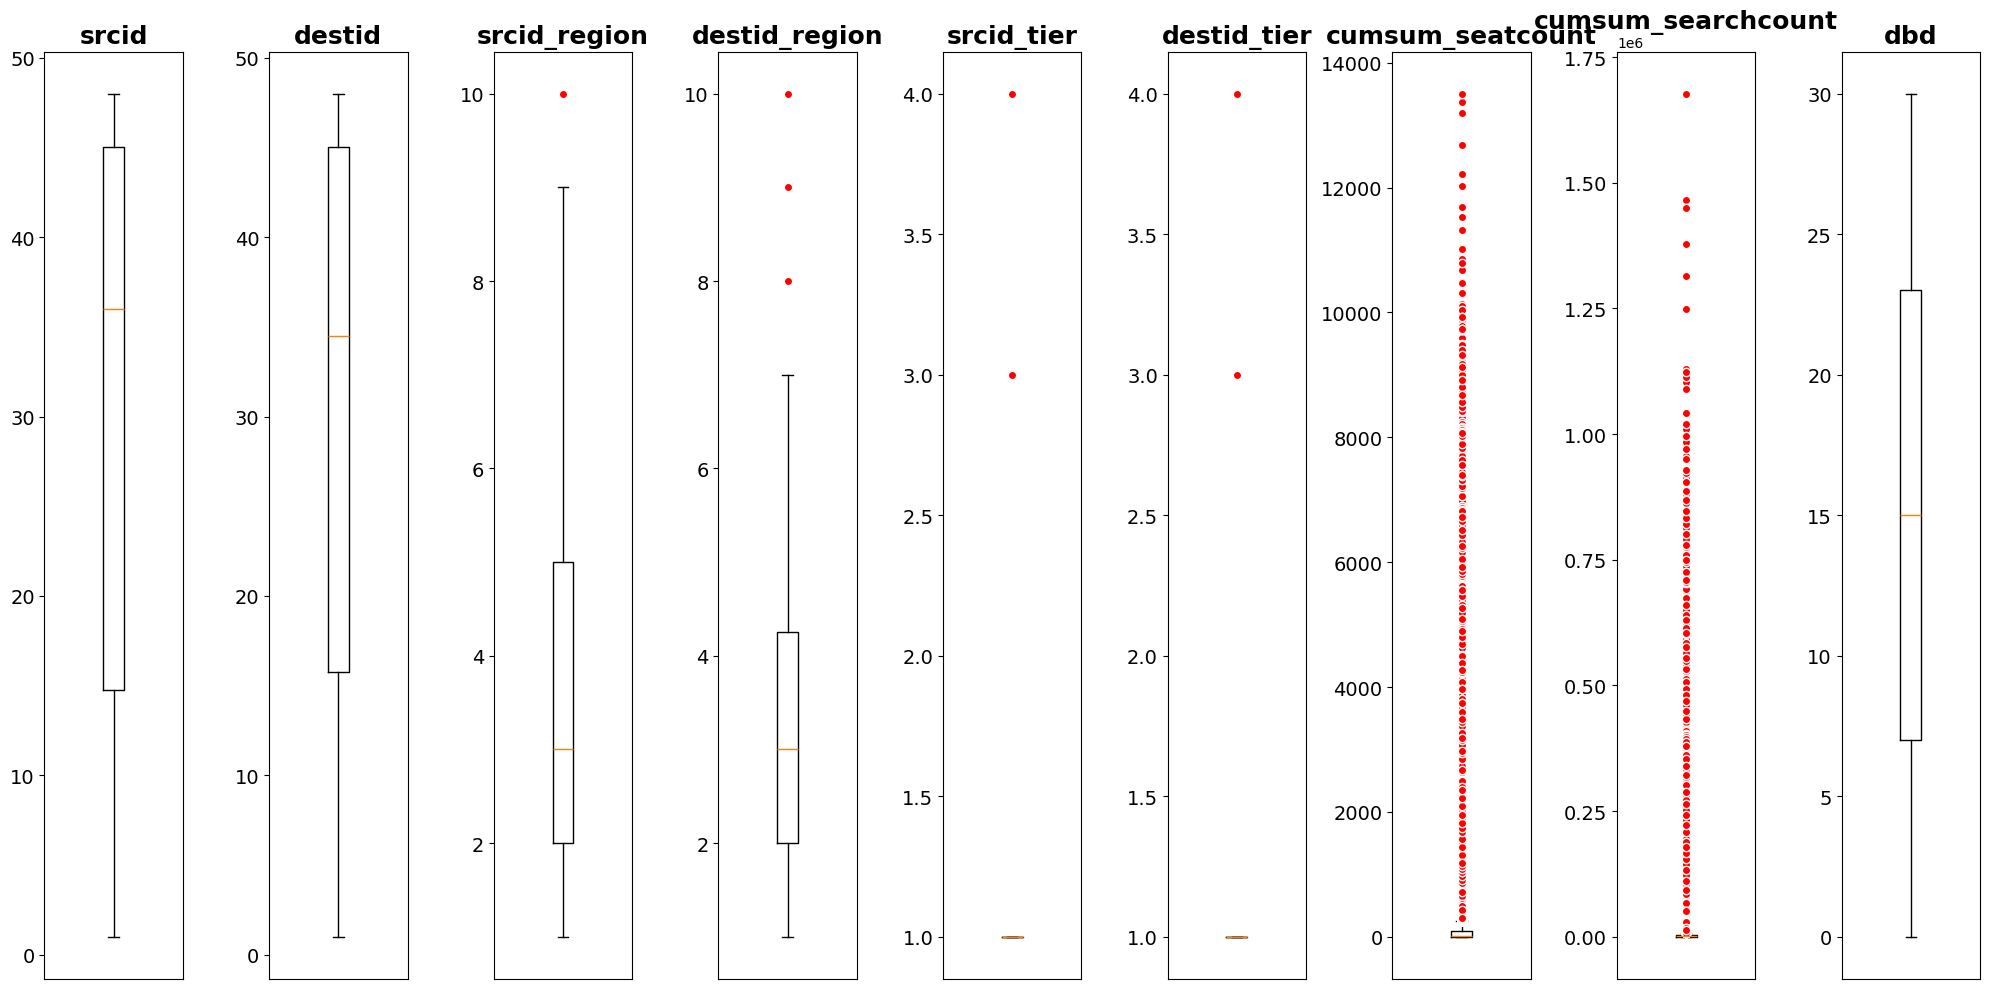

In [39]:
int_df = transactions_df.select_dtypes(include=['int32', 'int64'])

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')


fig, axs = plt.subplots(1, len(int_df.columns), figsize=(20, 10))

if len(int_df.columns) == 1:
    axs = [axs]

for i, ax in enumerate(axs):
    col_data = int_df.iloc[:, i].dropna()  
    ax.boxplot(col_data, flierprops=red_circle)
    ax.set_title(int_df.columns[i], fontsize=18, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks([])  

plt.tight_layout()

In [40]:
plt.show()

<Axes: >

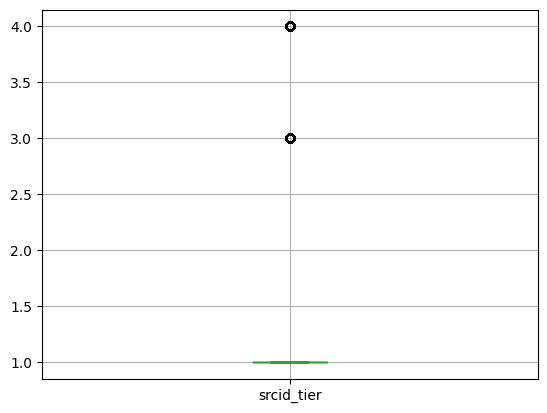

In [41]:
transactions_df.boxplot(column= 'srcid_tier')

<Axes: >

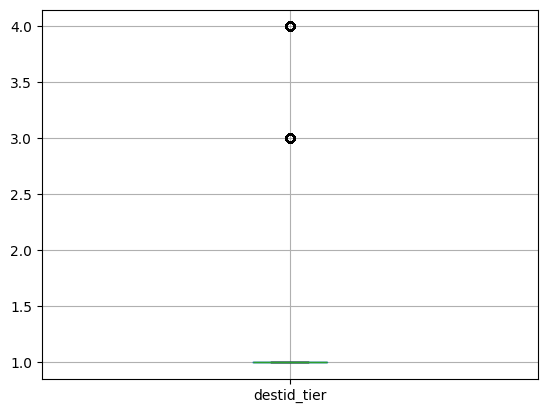

In [42]:
transactions_df.boxplot(column= 'destid_tier')

<Axes: >

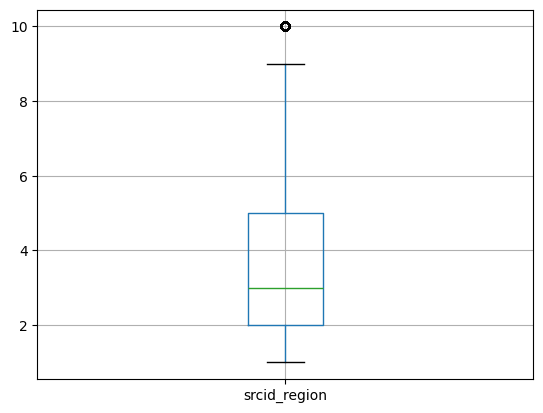

In [43]:
transactions_df.boxplot(column= 'srcid_region')

<Axes: >

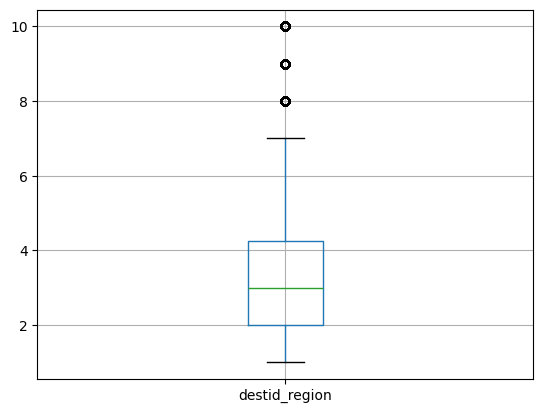

In [44]:
transactions_df.boxplot(column= 'destid_region')

<Axes: >

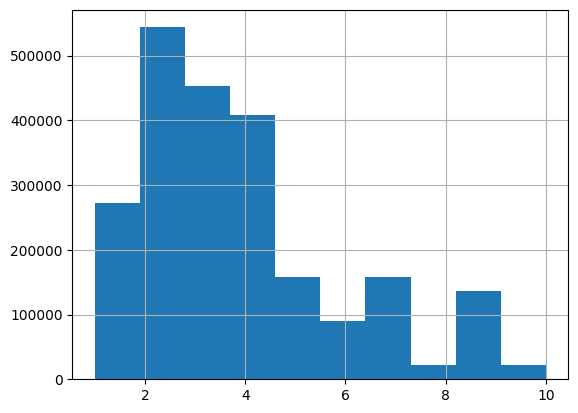

In [45]:
transactions_df['srcid_region'].hist(bins = 10)

<Axes: >

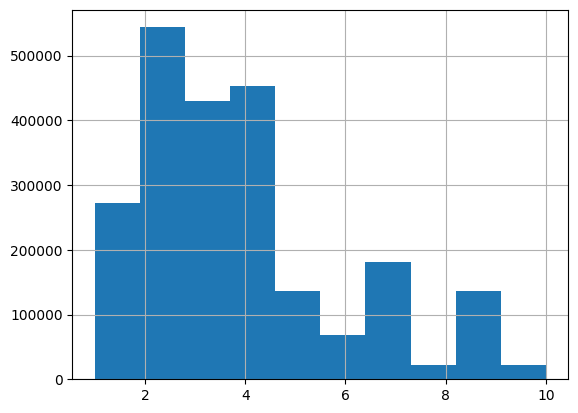

In [46]:
transactions_df['destid_region'].hist(bins = 10)

<Axes: >

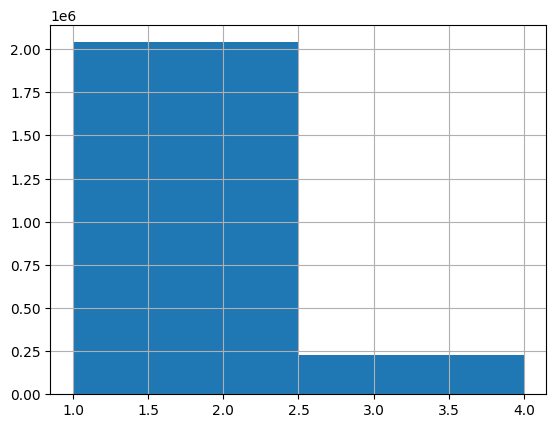

In [47]:
transactions_df['srcid_tier'].hist(bins = 2)

<Axes: >

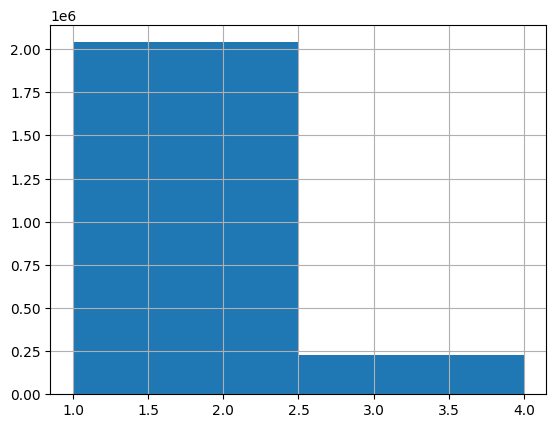

In [48]:
transactions_df['destid_tier'].hist(bins = 2)

<Axes: >

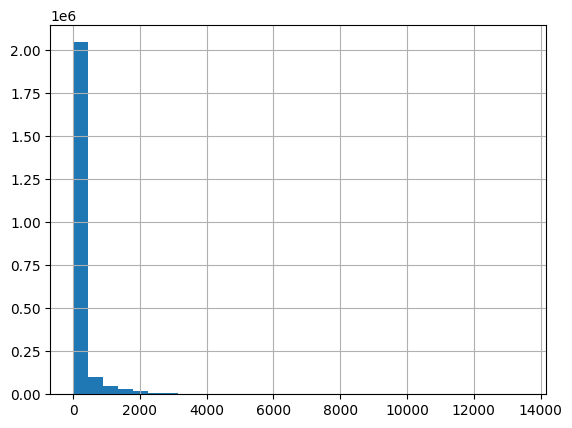

In [49]:
transactions_df['cumsum_seatcount'].hist(bins = 30)

<Axes: >

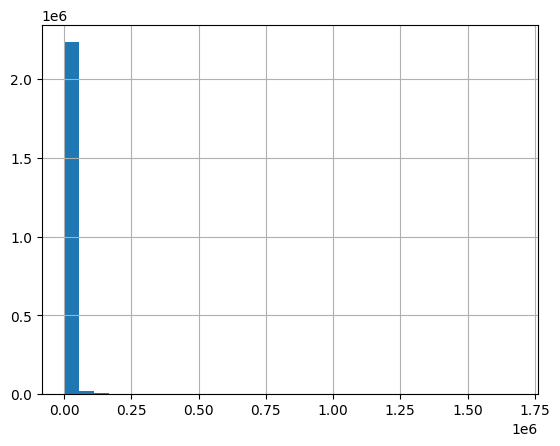

In [50]:
transactions_df['cumsum_searchcount'].hist(bins = 30)

<Axes: >

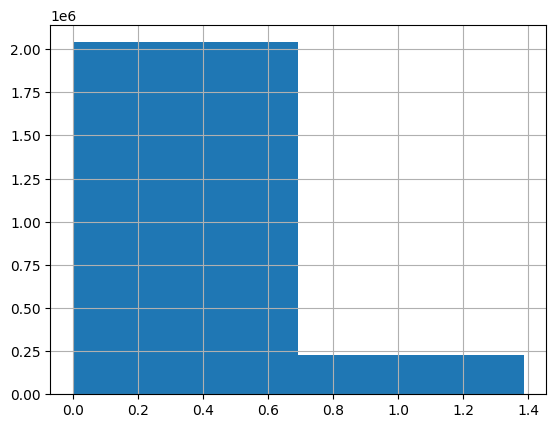

In [51]:
valid_values1 = transactions_df['srcid_tier'][transactions_df['srcid_tier'] > 0]
transactions_df['srcid_tier_log'] = np.log(valid_values1)
transactions_df['srcid_tier_log'].hist(bins =2)

<Axes: >

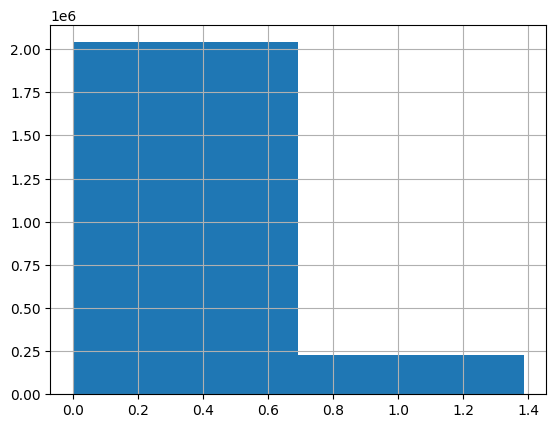

In [52]:
valid_values2 = transactions_df['destid_tier'][transactions_df['destid_tier'] > 0]
transactions_df['destid_tier_log'] = np.log(valid_values2)
transactions_df['destid_tier_log'].hist(bins =2)

<Axes: >

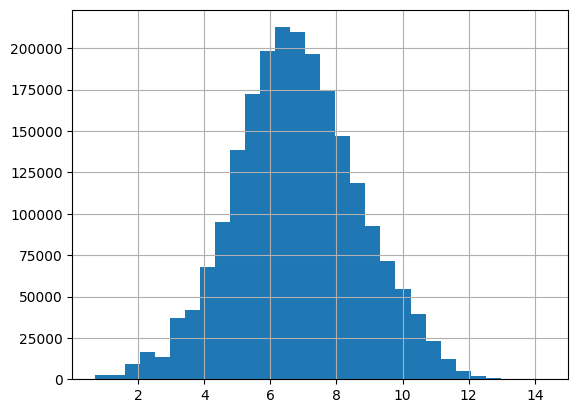

In [53]:
valid_values3 = transactions_df['cumsum_searchcount'][transactions_df['cumsum_searchcount'] > 0]
transactions_df['cumsum_searchcount_log'] = np.log(valid_values3)
transactions_df['cumsum_searchcount_log'].hist(bins =30)

<Axes: >

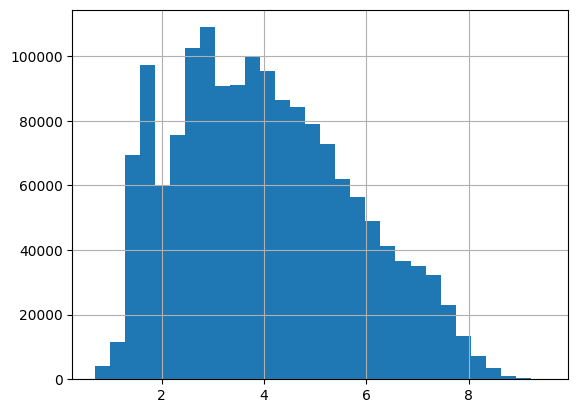

In [54]:
valid_values2 = transactions_df['cumsum_seatcount'][transactions_df['cumsum_seatcount'] > 0]
transactions_df['cumsum_seatcount_log'] = np.log(valid_values2)
transactions_df['cumsum_seatcount_log'].hist(bins =30)

In [55]:
train_df.isnull().sum()

doj                0
srcid              0
destid             0
final_seatcount    0
dtype: int64

<Axes: >

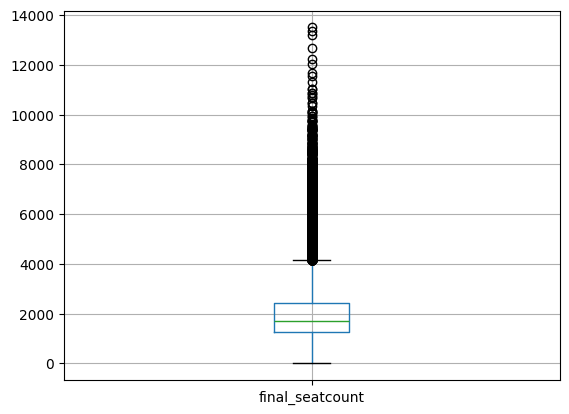

In [56]:
train_df.boxplot(column= 'final_seatcount')

<Axes: >

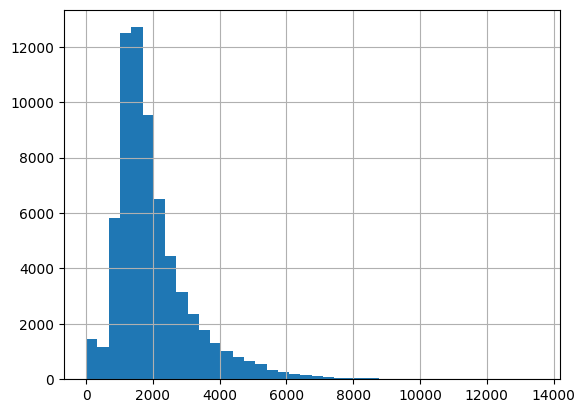

In [57]:
train_df['final_seatcount'].hist(bins = 40)

In [58]:
from scipy.stats import boxcox

# Box-Cox only works with positive data
final_seatcount_positive = train_df['final_seatcount'][train_df['final_seatcount'] > 0]

# Apply boxcox
seatcount_boxcox, fitted_lambda = boxcox(final_seatcount_positive)

# Save transformed data
train_df.loc[train_df['final_seatcount'] > 0, 'final_seatcount_boxcox'] = seatcount_boxcox

print("Best lambda for Box-Cox:", fitted_lambda)


Best lambda for Box-Cox: 0.3242879197982833


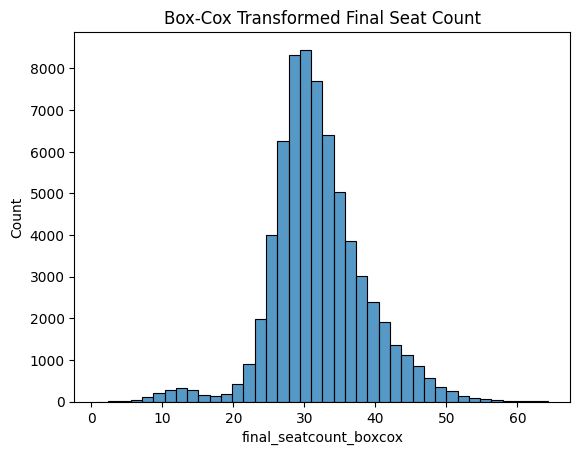

In [59]:
import seaborn as sns
sns.histplot(train_df['final_seatcount_boxcox'], bins=40)
plt.title("Box-Cox Transformed Final Seat Count")
plt.show()


In [60]:
train_df.head()

,doj,srcid,destid,final_seatcount,final_seatcount_boxcox
0,2023-03-01,45,46,2838,37.545629
1,2023-03-01,46,45,2298,34.857815
2,2023-03-01,45,47,2720,36.989928
3,2023-03-01,47,45,2580,36.309069
4,2023-03-01,46,9,4185,42.999381


In [63]:
train_df.head()

,doj,srcid,destid,final_seatcount,final_seatcount_boxcox
0,2023-03-01,45,46,2838,37.545629
1,2023-03-01,46,45,2298,34.857815
2,2023-03-01,45,47,2720,36.989928
3,2023-03-01,47,45,2580,36.309069
4,2023-03-01,46,9,4185,42.999381


In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67200 entries, 0 to 67199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   doj                     67200 non-null  datetime64[ns]
 1   srcid                   67200 non-null  int64         
 2   destid                  67200 non-null  int64         
 3   final_seatcount         67200 non-null  int64         
 4   final_seatcount_boxcox  67200 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.6 MB


In [65]:
train_df['final_seatcount_boxcox'] = train_df['final_seatcount_boxcox'].astype(int)

In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67200 entries, 0 to 67199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   doj                     67200 non-null  datetime64[ns]
 1   srcid                   67200 non-null  int64         
 2   destid                  67200 non-null  int64         
 3   final_seatcount         67200 non-null  int64         
 4   final_seatcount_boxcox  67200 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 2.6 MB


In [67]:
train_df.isnull().sum()

doj                       0
srcid                     0
destid                    0
final_seatcount           0
final_seatcount_boxcox    0
dtype: int64

In [68]:
transactions_df.isnull().sum()

doj                            0
doi                            0
srcid                          0
destid                         0
srcid_region                   0
destid_region                  0
srcid_tier                     0
destid_tier                    0
cumsum_seatcount               0
cumsum_searchcount             0
dbd                            0
srcid_tier_log                 0
destid_tier_log                0
cumsum_searchcount_log    109528
cumsum_seatcount_log      677240
dtype: int64

In [69]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266100 entries, 0 to 2266099
Data columns (total 15 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   doj                     datetime64[ns]
 1   doi                     datetime64[ns]
 2   srcid                   int64         
 3   destid                  int64         
 4   srcid_region            int64         
 5   destid_region           int64         
 6   srcid_tier              int64         
 7   destid_tier             int64         
 8   cumsum_seatcount        int64         
 9   cumsum_searchcount      int64         
 10  dbd                     int64         
 11  srcid_tier_log          float64       
 12  destid_tier_log         float64       
 13  cumsum_searchcount_log  float64       
 14  cumsum_seatcount_log    float64       
dtypes: datetime64[ns](2), float64(4), int64(9)
memory usage: 259.3 MB


In [70]:
transactions_df.head()

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,srcid_tier_log,destid_tier_log,cumsum_searchcount_log,cumsum_seatcount_log
0,2023-03-01,2023-01-30,45,46,1,2,1,1,8,76,30,0.0,0.0,4.330733,2.079442
1,2023-03-01,2023-01-30,46,45,2,1,1,1,8,70,30,0.0,0.0,4.248495,2.079442
2,2023-03-01,2023-01-30,45,47,1,3,1,1,4,142,30,0.0,0.0,4.955827,1.386294
3,2023-03-01,2023-01-30,47,45,3,1,1,1,0,68,30,0.0,0.0,4.219508,NaN
4,2023-03-01,2023-01-30,46,9,2,2,1,1,9,162,30,0.0,0.0,5.087596,2.197225


In [71]:
transactions_df['cumsum_searchcount_log'] = transactions_df['cumsum_searchcount_log'].fillna(transactions_df['cumsum_searchcount_log'].mean())
transactions_df['cumsum_seatcount_log'] = transactions_df['cumsum_seatcount_log'].fillna(transactions_df['cumsum_seatcount_log'].mean())

In [75]:
transactions_df['cumsum_seatcount_log'] = transactions_df['cumsum_seatcount_log'].astype(int)
transactions_df['cumsum_searchcount_log'] = transactions_df['cumsum_searchcount_log'].astype(int)
transactions_df['srcid_tier_log'] = transactions_df['srcid_tier_log'].astype(int)
transactions_df['destid_tier_log'] = transactions_df['destid_tier_log'].astype(int)

transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266100 entries, 0 to 2266099
Data columns (total 15 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   doj                     datetime64[ns]
 1   doi                     datetime64[ns]
 2   srcid                   int64         
 3   destid                  int64         
 4   srcid_region            int64         
 5   destid_region           int64         
 6   srcid_tier              int64         
 7   destid_tier             int64         
 8   cumsum_seatcount        int64         
 9   cumsum_searchcount      int64         
 10  dbd                     int64         
 11  srcid_tier_log          int64         
 12  destid_tier_log         int64         
 13  cumsum_searchcount_log  int64         
 14  cumsum_seatcount_log    int64         
dtypes: datetime64[ns](2), int64(13)
memory usage: 259.3 MB


In [76]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266100 entries, 0 to 2266099
Data columns (total 15 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   doj                     datetime64[ns]
 1   doi                     datetime64[ns]
 2   srcid                   int64         
 3   destid                  int64         
 4   srcid_region            int64         
 5   destid_region           int64         
 6   srcid_tier              int64         
 7   destid_tier             int64         
 8   cumsum_seatcount        int64         
 9   cumsum_searchcount      int64         
 10  dbd                     int64         
 11  srcid_tier_log          int64         
 12  destid_tier_log         int64         
 13  cumsum_searchcount_log  int64         
 14  cumsum_seatcount_log    int64         
dtypes: datetime64[ns](2), int64(13)
memory usage: 259.3 MB


In [77]:
!pip install lightgbm
!pip install holidays

In [79]:
import holidays
# Filter 15 days before departure
trans_15 = transactions_df[transactions_df['dbd'] == 15].copy()

# Aggregate features
agg_15 = trans_15.groupby(['doj', 'srcid', 'destid']).agg({
    'cumsum_seatcount': 'max',
    'cumsum_searchcount': 'max',
    'srcid_region': 'first',
    'destid_region': 'first',
    'srcid_tier': 'first',
    'destid_tier': 'first'
}).reset_index()

# Add time features
agg_15['day_of_week'] = agg_15['doj'].dt.dayofweek
agg_15['month'] = agg_15['doj'].dt.month
agg_15['is_weekend'] = agg_15['day_of_week'].isin([5, 6]).astype(int)

# Add holiday feature
indian_holidays = holidays.India(years=[2023, 2024, 2025])
agg_15['is_holiday'] = agg_15['doj'].isin(indian_holidays).astype(int)

# Merge with train data
train_merged = pd.merge(train_df, agg_15, on=['doj', 'srcid', 'destid'], how='left').dropna()

# Model training
features = ['srcid', 'destid', 'cumsum_seatcount', 'cumsum_searchcount',
            'srcid_region', 'destid_region', 'srcid_tier', 'destid_tier',
            'day_of_week', 'month', 'is_weekend', 'is_holiday']

X = train_merged[features]
y = train_merged['final_seatcount']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 53760, number of used features: 12
[LightGBM] [Info] Start training from score 2003.632533


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [80]:
val_preds = model.predict(X_val)
mae = mean_absolute_error(y_val, val_preds)
print("Validation MAE:", mae)

Validation MAE: 332.80161919382067


In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [91]:
val_preds = model.predict(X_val)
residuals = y_val - val_preds

# Mean Absolute Error (already used)
mae = mean_absolute_error(y_val, val_preds)
print("MAE:", mae)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_val, val_preds)
print("RMSE:", rmse)

# R² Score (how well your model explains the variance)
r2 = r2_score(y_val, val_preds)
print("R² Score:", r2)

MAE: 332.80161919382067
RMSE: 216999.08146660592
R² Score: 0.8492955305212124


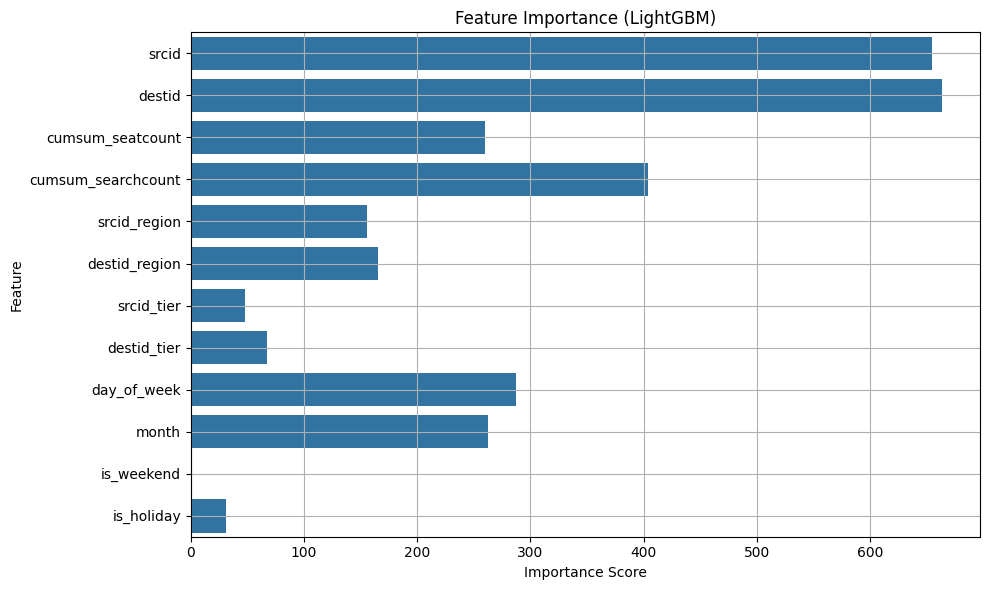

In [95]:
importances = model.feature_importances_
feat_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance (LightGBM)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()

Validation MAE: 332.80
Validation RMSE: 216999.08
Validation R² Score: 0.8493


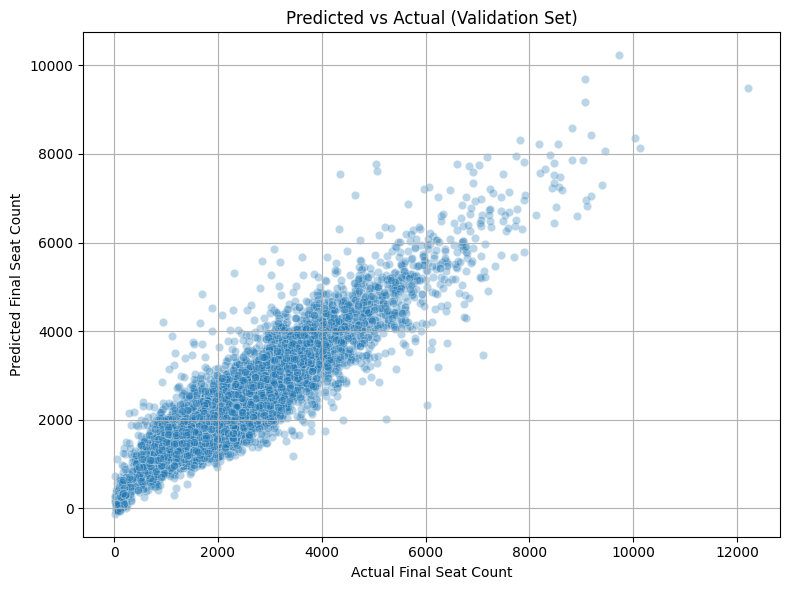

In [92]:
val_preds = model.predict(X_val)
mae = mean_absolute_error(y_val, val_preds)
rmse = mean_squared_error(y_val, val_preds)
r2 = r2_score(y_val, val_preds)

print(f"Validation MAE: {mae:.2f}")
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation R² Score: {r2:.4f}")

# Plot predictions vs actual
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=val_preds, alpha=0.3)
plt.xlabel("Actual Final Seat Count")
plt.ylabel("Predicted Final Seat Count")
plt.title("Predicted vs Actual (Validation Set)")
plt.grid(True)
plt.tight_layout()
plt.show()

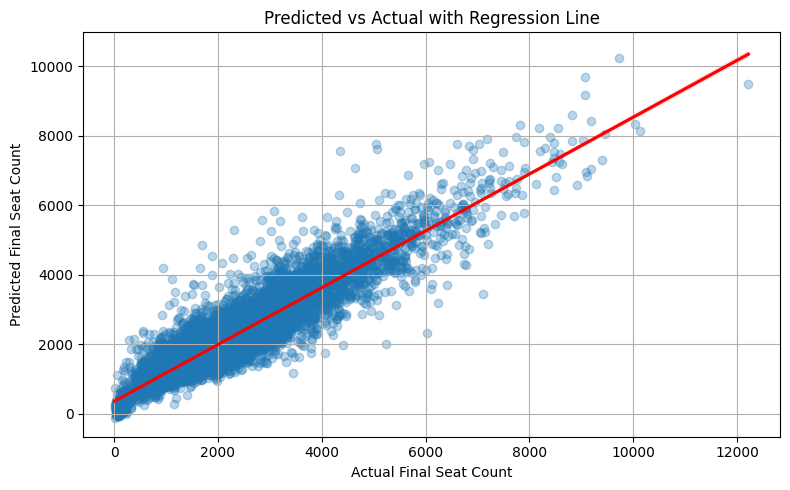

In [93]:
plt.figure(figsize=(8, 5))
sns.regplot(x=y_val, y=val_preds, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Actual Final Seat Count")
plt.ylabel("Predicted Final Seat Count")
plt.title("Predicted vs Actual with Regression Line")
plt.grid(True)
plt.tight_layout()
plt.show()

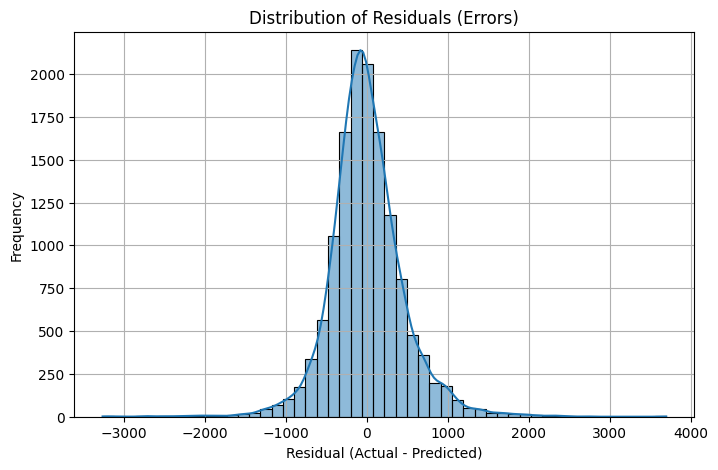

In [94]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [86]:
test_agg = pd.merge(test_df, agg_15, on=['doj', 'srcid', 'destid'], how='left')
test_agg = test_agg.fillna({
    'cumsum_seatcount': 0,
    'cumsum_searchcount': 0,
    'srcid_region': 0,
    'destid_region': 0,
    'srcid_tier': 0,
    'destid_tier': 0,
    'day_of_week': test_agg['doj'].dt.dayofweek,
    'month': test_agg['doj'].dt.month,
    'is_weekend': test_agg['doj'].dt.dayofweek.isin([5, 6]).astype(int),
    'is_holiday': test_agg['doj'].isin(indian_holidays).astype(int)
})

X_test = test_agg[features]
test_preds = model.predict(X_test)
test_preds = np.round(test_preds).astype(int)

In [87]:
submission = pd.DataFrame({
    'route_key': test_df['route_key'],
    'final_seatcount': test_preds
})

In [88]:
submission.head()

,route_key,final_seatcount
0,2025-02-11_46_45,3350
1,2025-01-20_17_23,1521
2,2025-01-08_02_14,1234
3,2025-01-08_08_47,1133
4,2025-01-08_09_46,3244


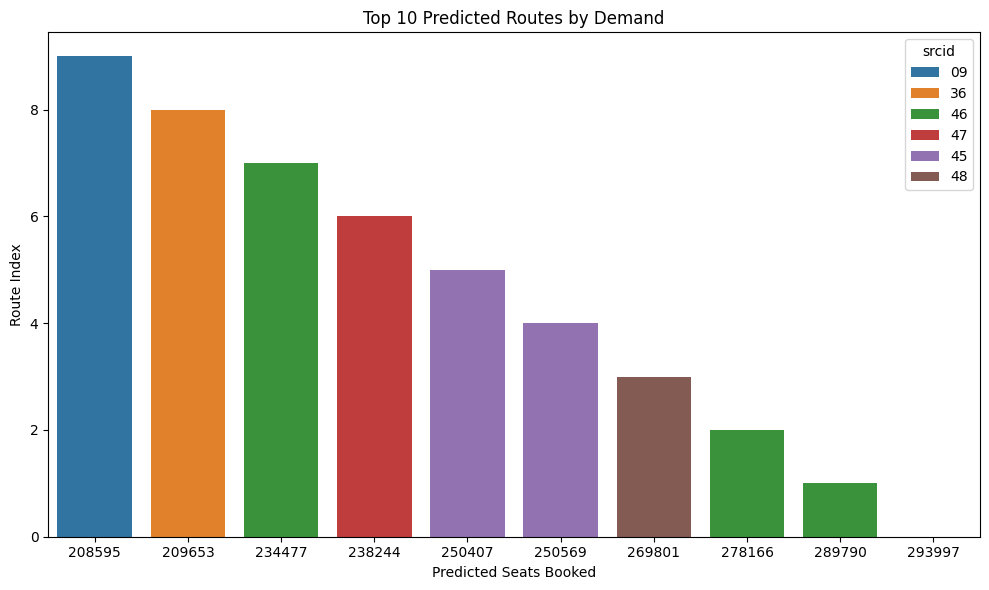

In [98]:
submission[['doj', 'srcid', 'destid']] = submission['route_key'].str.split('_', expand=True)
submission['final_seatcount'] = submission['final_seatcount'].astype(int)

# Top 10 predicted routes
top_routes = (
    submission.groupby(['srcid', 'destid'])['final_seatcount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_routes, x='final_seatcount', y=top_routes.index,
            hue='srcid', dodge=False)
plt.title("Top 10 Predicted Routes by Demand")
plt.xlabel("Predicted Seats Booked")
plt.ylabel("Route Index")
plt.tight_layout()
plt.show()

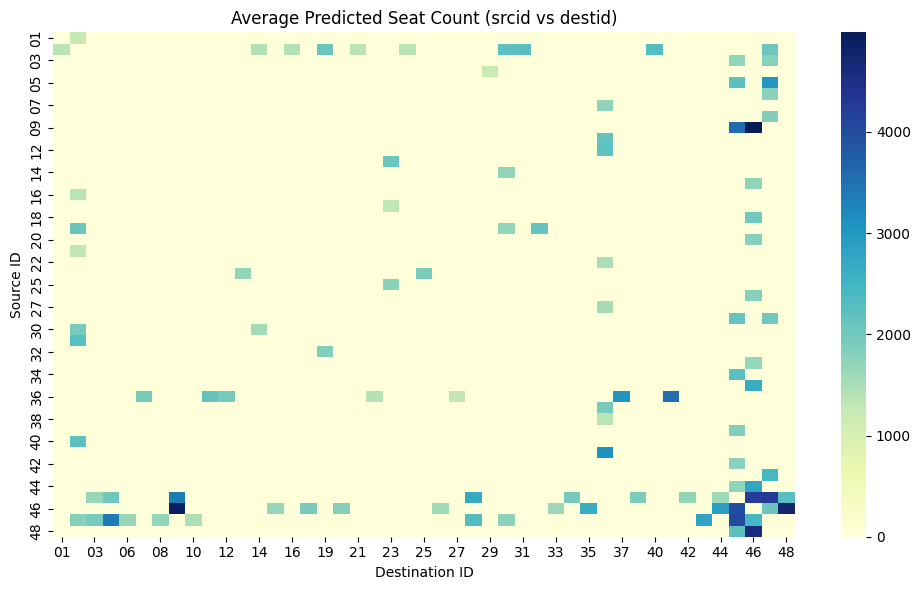

In [102]:
heatmap_data = (
    submission.groupby(['srcid', 'destid'])['final_seatcount']
    .mean()
    .unstack(fill_value=0)
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title("Average Predicted Seat Count (srcid vs destid)")
plt.xlabel("Destination ID")
plt.ylabel("Source ID")
plt.tight_layout()
plt.show()

In [103]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   route_key        5900 non-null   object
 1   final_seatcount  5900 non-null   int64 
 2   doj              5900 non-null   object
 3   srcid            5900 non-null   object
 4   destid           5900 non-null   object
dtypes: int64(1), object(4)
memory usage: 230.6+ KB


In [104]:
submission.describe()

,final_seatcount
count,5900.000000
mean,2191.781186
std,1140.440290
min,140.000000
25%,1433.750000
50%,1832.000000
75%,2534.250000
max,10170.000000


In [105]:
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv created.")

✅ submission.csv created.
